In [4]:
function ruleGen(rule::Int)
    rule = digits(rule, base=2, pad=8)
    rules = Dict{Array{Bool,1}, Bool}()
    
    for i in 0:7
        x = digits(i, base=2, pad=3)
        #println(rule[i+1], " -> ", x)
        rules[[x[3], x[2], x[1]]] = rule[i+1]
    end
    
    return rules
end

function CA(rule::Int, seed::Array{Bool,1}, iterations::Int)
    if !(rule >= 0 && rule <= 255)
        error("Incorrect rule [0-255]")
    end
    
    if (iterations < 1)
        error("Must have positive iterations.")
    end
    
    rules = ruleGen(rule)
    
    n = length(seed)
    result = falses(n,iterations+1)
    state = falses(3)
    
    result[:,1] = seed
    
    for it in 2:iterations+1
        for i in 1:n
            left = mod1(i-1, n)
            right = mod1(i+1, n)
            
            state[1] = result[left, it-1]
            state[2] = result[i, it-1]
            state[3] = result[right, it-1]
            
            result[i, it] = rules[state]
        end
    end
    
    return result
end

function CA(rule::Int, seed::BitArray{1}, iterations::Int)
    seed = convert(Array{Bool,1}, seed)
    
    return CA(rule, seed, iterations)
end

function CA(rule::Int, seed::Array{<:Int, 1}, iterations::Int)
    int_to_bool = x->convert(Array{Bool,1},x)
    return CA(rule, int_to_bool(seed), iterations)
end

CA (generic function with 3 methods)

In [2]:
using PyPlot

In [5]:
r105tp = CA(105, [1,0,0,0, 0,0,0,0], 7)

8×8 BitArray{2}:
  true  false   true  false   true  false   true  false
 false  false  false   true  false  false  false   true
 false   true   true  false  false   true   true  false
 false   true  false  false  false   true  false  false
 false   true  false   true  false   true  false   true
 false   true  false  false  false   true  false  false
 false   true   true  false  false   true   true  false
 false  false  false   true  false  false  false   true

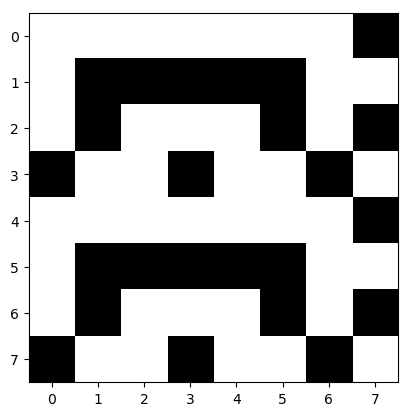

PyObject <matplotlib.image.AxesImage object at 0x7f0e420567f0>

In [10]:
imshow(rotr90(r105tp), cmap="binary")

In [11]:
sum(r105tp .> 0.5)

24

In [38]:
rules = [60, 90, 102, 105, 153, 165, 180, 195]

8-element Array{Int64,1}:
  60
  90
 102
 105
 153
 165
 180
 195

In [41]:
showtest(rule::Int) = imshow(rotr90(CA(rule, [1,0,0,0, 0,0,0,0], 7)),cmap="bone")

showtest (generic function with 1 method)

In [47]:
rules[1]

60

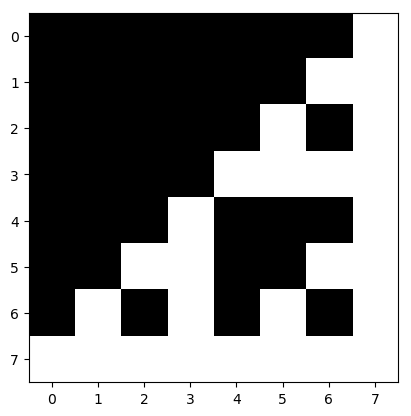

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d6f1ba8>

In [43]:
showtest(rules[1])

In [48]:
rules[2]

90

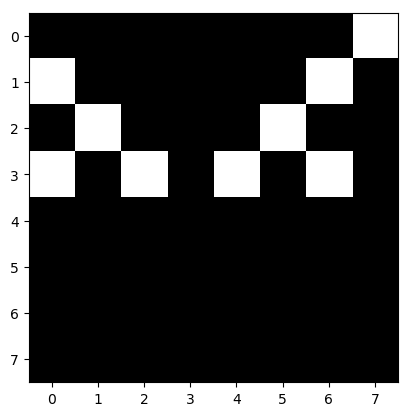

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d65e898>

In [44]:
showtest(rules[2])

In [49]:
rules[3]

102

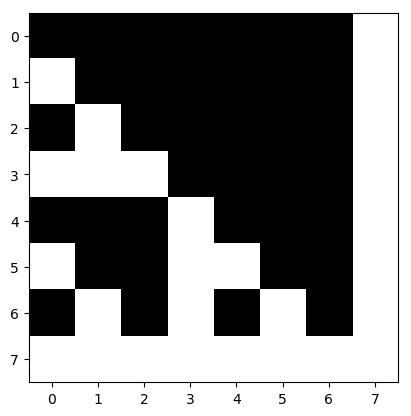

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d63dfd0>

In [45]:
showtest(rules[3])

In [50]:
rules[4]

105

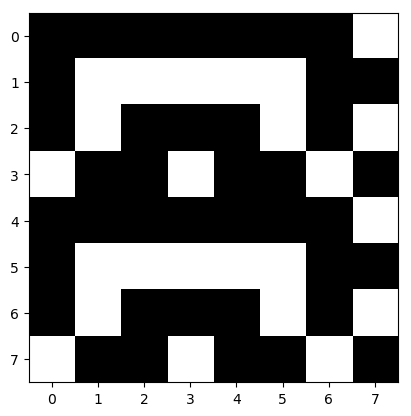

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d5af278>

In [46]:
showtest(rules[4])

In [54]:
rules[5]

153

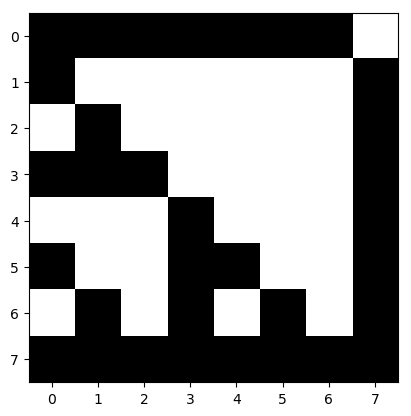

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d512f28>

In [51]:
showtest(rules[5])

In [56]:
rules[6]

165

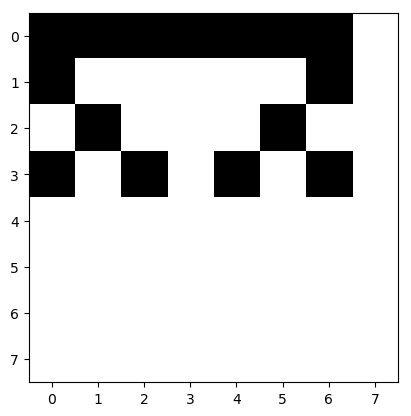

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d469908>

In [55]:
showtest(rules[6])

In [57]:
rules[7]

180

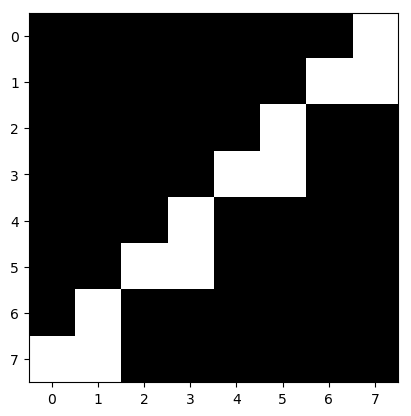

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d3d35f8>

In [58]:
showtest(rules[7])

In [59]:
rules[8]

195

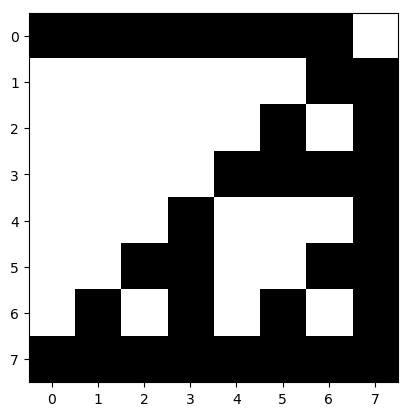

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d3be2e8>

In [60]:
showtest(rules[8])

In [12]:
r102tp = CA(102, [1,0,0,0, 0,0,0,0], 7)

8×8 BitArray{2}:
  true   true   true   true   true   true   true  true
 false  false  false  false  false  false  false  true
 false  false  false  false  false  false   true  true
 false  false  false  false  false   true  false  true
 false  false  false  false   true   true   true  true
 false  false  false   true  false  false  false  true
 false  false   true   true  false  false   true  true
 false   true  false   true  false   true  false  true

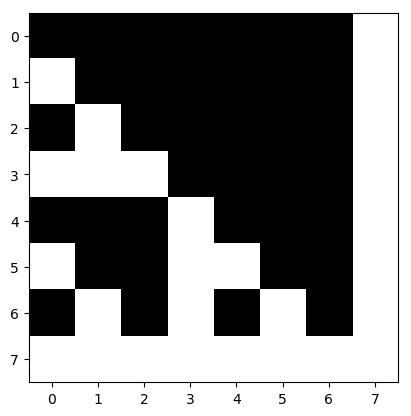

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d82b860>

In [37]:
imshow(rotr90(r102tp), cmap="bone")

In [14]:
sum(r102tp .> 0.5)

27

In [15]:
r60tp = CA(60, [1,0,0,0, 0,0,0,0], 7)

8×8 BitArray{2}:
  true   true   true   true   true   true   true  true
 false   true  false   true  false   true  false  true
 false  false   true   true  false  false   true  true
 false  false  false   true  false  false  false  true
 false  false  false  false   true   true   true  true
 false  false  false  false  false   true  false  true
 false  false  false  false  false  false   true  true
 false  false  false  false  false  false  false  true

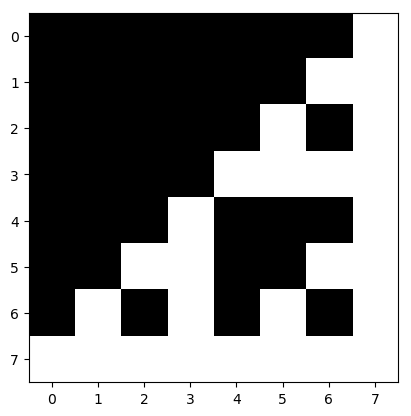

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d9761d0>

In [34]:
imshow(rotr90(r60tp), cmap="bone")

In [17]:
sum(r60tp .> 0.5)

27

In [18]:
r90tp = CA(90, [1,0,0,0, 0,0,0,0], 7)

8×8 BitArray{2}:
  true  false  false  false  false  false  false  false
 false   true  false   true  false  false  false  false
 false  false   true  false  false  false  false  false
 false  false  false   true  false  false  false  false
 false  false  false  false  false  false  false  false
 false  false  false   true  false  false  false  false
 false  false   true  false  false  false  false  false
 false   true  false   true  false  false  false  false

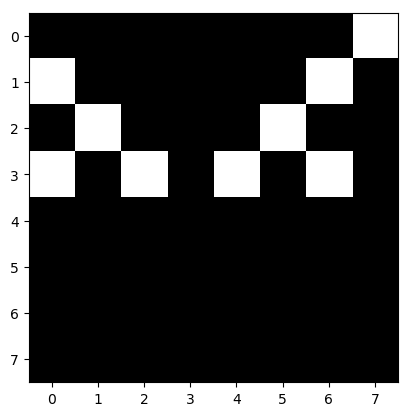

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d8d5e80>

In [35]:
imshow(rotr90(r90tp), cmap="bone")

In [20]:
sum(r90tp .> 0.5)

9

In [21]:
r153tp = CA(153, [1,0,0,0, 0,0,0,0], 7)

8×8 BitArray{2}:
  true  false  false  false  false  false  false  false
 false   true   true   true   true   true   true  false
 false   true   true   true   true   true  false  false
 false   true   true   true   true  false   true  false
 false   true   true   true  false  false  false  false
 false   true   true  false   true   true   true  false
 false   true  false  false   true   true  false  false
 false  false   true  false   true  false   true  false

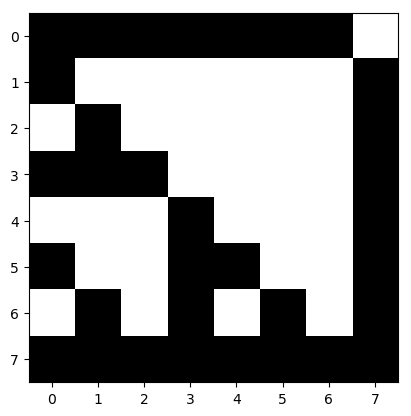

PyObject <matplotlib.image.AxesImage object at 0x7f0e3d8c2b70>

In [36]:
imshow(rotr90(r153tp), cmap="bone")

In [24]:
sum(r153tp, dims=1)

1×8 Array{Int64,2}:
 1  6  6  4  6  4  4  0

In [23]:
sum(r153tp .> 0.5)

31

In [26]:
r165tp = CA(165, [1,0,0,0, 0,0,0,0], 7)

8×8 BitArray{2}:
  true   true   true   true  true  true  true  true
 false  false   true  false  true  true  true  true
 false   true  false   true  true  true  true  true
 false   true   true  false  true  true  true  true
 false   true   true   true  true  true  true  true
 false   true   true  false  true  true  true  true
 false   true  false   true  true  true  true  true
 false  false   true  false  true  true  true  true

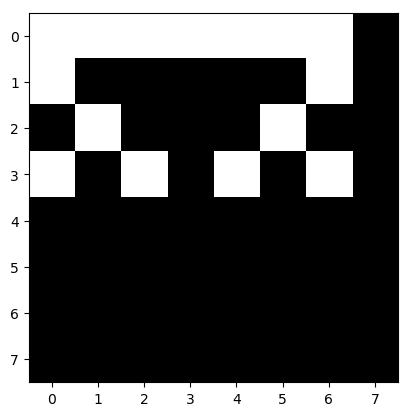

PyObject <matplotlib.image.AxesImage object at 0x7f0e4b858c18>

In [27]:
imshow(rotr90(r165tp), cmap="binary")

In [28]:
r180tp = CA(180, [1,0,0,0, 0,0,0,0], 7)

8×8 BitArray{2}:
  true   true  false  false  false  false  false  false
 false   true  false  false  false  false  false  false
 false  false   true   true  false  false  false  false
 false  false  false   true  false  false  false  false
 false  false  false  false   true   true  false  false
 false  false  false  false  false   true  false  false
 false  false  false  false  false  false   true   true
 false  false  false  false  false  false  false   true

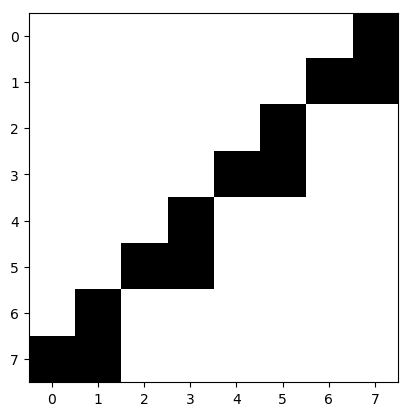

PyObject <matplotlib.image.AxesImage object at 0x7f0e4b7c5908>

In [29]:
imshow(rotr90(r180tp), cmap="binary")

In [30]:
r195tp = CA(195, [1,0,0,0, 0,0,0,0], 7)

8×8 BitArray{2}:
  true  false  false  false  false  false  false  false
 false  false   true  false   true  false   true  false
 false   true  false  false   true   true  false  false
 false   true   true  false   true   true   true  false
 false   true   true   true  false  false  false  false
 false   true   true   true   true  false   true  false
 false   true   true   true   true   true  false  false
 false   true   true   true   true   true   true  false

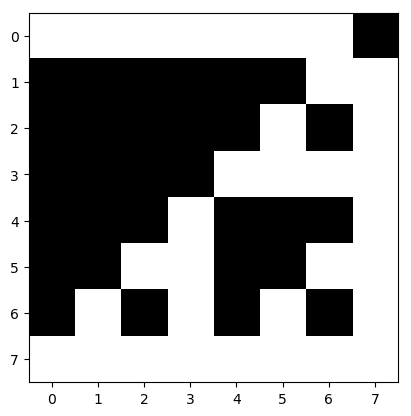

PyObject <matplotlib.image.AxesImage object at 0x7f0e4b7a85f8>

In [31]:
imshow(rotr90(r195tp), cmap="binary")